### Interview Attendance Problem

The Dataset consists of details of 1200 + candidates and the interviews they have attended. Also deals with candidate interview attendance for various clients. There are a set of questions that are asked by a recruiter while scheduling the candidate. The answers to these determine whether expected attendance is yes, no or uncertain.

**Objective: ** We would like to know if we can predict whether a candidate will attend interviews or not

**Attributes description:**

1. Date of Interview: This date refers to the day the candidates were scheduled for the interview. The formats vary.<br/>
2. Client name: The clients that gave the recruitment vendor the requisite mandate<br/>
3. Industry: This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)<br/>
4. LocationRefers: to the current location of the candidate<br/>
5. Position to be closed: Niche refers to rare skill sets while routine refers to more common skill sets<br/>
6. Nature of Skillset: This refers to the skill the client has and specifies the same<br/>
7. Interview Type: There are three types of interview-  <br/>
 * Walkin drives- these are unscheduled. Candidates are either contacted or they come to the interview on their own volition<br/>
 * Scheduled- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate. <br/>
 * The third one is a scheduled walkin. Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview<br/>
8. Name(Cand ID): This is a substitute to keep the candidates identity a secret<br/>
9. Gender: Whether the candidate is male or female<br/>
10. Candidate Current Location<br/>
11. Candidate Job Location<br/>
12. Interview Venue<br/>
13. Candidate Native location<br/>
14. Have you obtained the necessary permission to start at the required time<br/>
15. Hope there will be no unscheduled meetings<br/>
16. Can I Call you three hours before the interview and follow up on your attendance for the interview<br/>
17. Can I have an alternative number/ desk number. I assure you that I will not trouble you too much<br/>
18. Have you taken a printout of your updated resume. Have you read the JD and understood the same<br/>
19. Are you clear with the venue details and the landmark.<br/>
20. Has the call letter been shared<br/>
21. Expected Attendance: Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain<br/>
22. Observed Attendance: Whether the candidate attended the interview. This is binary and will form our dependent variable<br/>
23. Marital Status: Whether the candidate is married or Single<br/>


### Importing data <a name='id'></a>

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# import visualization libraries
import seaborn as sns ### For visualizations
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Aravind/Desktop/ML Assignment/8; Naive Baye/Assignment/Assignment Interview.csv")

In [3]:
data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [4]:
data.isnull().sum()

Date of Interview                                                                                       0
Client name                                                                                             0
Industry                                                                                                0
Location                                                                                                0
Position to be closed                                                                                   0
Nature of Skillset                                                                                      0
Interview Type                                                                                          0
Name(Cand ID)                                                                                           0
Gender                                                                                                  0
Candidate Current Location                    

**Observations:**<br/>
There are missing values.<br/>
Most of the variables are categorical data.

In [5]:
data1 = data.rename(columns={'Have you obtained the necessary permission to start at the required time': 'permission', 
                             'Hope there will be no unscheduled meetings': 'meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview' : 'Reminder',
                             'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Alternate number',
                             'Have you taken a printout of your updated resume. Have you read the JD and understood the same' :'Resume printout & JD',
                             'Are you clear with the venue details and the landmark.' : 'Venue clear',
                             'Has the call letter been shared' : 'Call letter shared',
                             'Nature of Skillset' : 'Skillset',
                             'Position to be closed' : 'Position',
                             'Candidate Native location' : 'Native',
                             'Candidate Current Location' : 'Current Location'}) ### renaming column names


**Note:**<br/>
Renamed some column names as short and simple

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 23 columns):
Date of Interview         1232 non-null object
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Name(Cand ID)             1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call 

**Observations**<br/>
There are missing values.<br/>
23 columns and 1232 rows

### Question: Perform Descriptive Statistics on the dataset 

In [7]:
data1.describe()

,Date of Interview,Client name,Industry,Location,Position,Skillset,Interview Type,Name(Cand ID),Gender,Current Location,...,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
count,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,...,1028,985,985,985,984,984,987,1227,1232,1232
unique,95,15,7,11,7,91,6,1232,2,10,...,7,7,5,6,8,6,12,6,8,2
top,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 460,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
freq,220,903,948,754,1022,220,456,1,964,754,...,917,948,950,935,939,946,932,882,700,767


**Note:**<br/>
Count of each column differs as there are missing values in certain columns <br/>
Top is the most common value from each column.<br/>
Freq is the most common value's frequency.<br/>


### Data Cleaning<a name='dc'></a>

In [8]:
print(data1['Date of Interview'].unique())

['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '4/12/2016'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15-Apr-16' '19-Apr-16' '20-Apr-16' '21-Apr-16'
 '22-Apr-16' '25-Apr-16' '18-Apr-16' '11.5.16' '10.5.16' '11.05.16'
 '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019' '12.04.2020'
 '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16' '19.03.16'
 '24.05.2016' '5/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/16' '21.4.15' '22.01.20

**Observations:**<br/>
Prints all unique values from Date column. there are so many formats. Some dates are separated by '-', some by '.', some by '/', some dates are included with time.. Need to fix this

#### Cleaning date column


In [9]:
def clean_date(date):
    date = date.str.strip()
    date = date.str.split("&").str[0]
    date = date.str.replace('–', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace('Apr', '04')
    date = date.str.replace('-', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('//+', '/')
    return date

data1['Date of Interview'] = clean_date(data1['Date of Interview'])

Function to clean the dates. Hope most of the cleaning done in date column

In [10]:
print(data1['Date of Interview'].unique())

['13/02/2015' '19/06/2015' '23/06/2015' '29/06/2015' '25/06/2015'
 '25/05/16' '25/5/2016' '25/05/2016' '4/12/2016' '13/04/2016' '27/02/2016'
 '07/05/2016' '5/5/16' '4/5/16' '21/4/16' '22/4/16' '23/4/16' '15/04/16'
 '19/04/16' '20/04/16' '21/04/16' '22/04/16' '25/04/16' '18/04/16'
 '11/5/16' '10/5/16' '11/05/16' '12/04/2016' '12/04/2017' '12/04/2018'
 '12/04/2019' '12/04/2020' '12/04/2021' '12/04/2022' '12/04/2023' '8/5/16'
 '7/5/16' '19/03/16' '24/05/2016' '5/11/2016' '26/05/2016' '10/05/2016'
 '28/08/2016/' '28/8/2016/' '13/06/2016' '02/09/2016' '02/12/2015'
 '23/02/2016' '22/03/2016' '26/02/2016' '06/02/2016' '21/4/2016' '21/4/15'
 '22/01/2016' '3/6/16' '3/6/2016' '09/01/2016' '9/1/2016' '03/04/2015'
 '13/03/2015' '17/03/2015' '18/03/2014' '4/04/15' '16/04/2015'
 '17/04/2015' '9/04/2015' '5/2/2015' '30/05/2016' '07/06/2016'
 '20/08/2016' '14/01/2016' '30/1/16' '30/01/2016' '30/01/16' '30/1/2016'
 '06/05/2016']


**Note:**<br/>
Now it seems somewhat okay. But still if you see, some years are formatted in 2 digit format and some are in 4 digit. Need to work on this more.

In [11]:
# Create new date variables
data1['year'] = data1['Date of Interview'].str.split("/").str[2]
data1['day'] = data1['Date of Interview'].str.split("/").str[0]
data1['month'] = data1['Date of Interview'].str.split("/").str[1]

# This will find the short years and replace with long years
data1['year'].replace(['16', '15'], ['2016', '2015'], inplace = True)

# Finally new Date column
data1['date'] = pd.to_datetime(pd.DataFrame({'year': data1['year'],
                                            'month': data1['month'],
                                            'day': data1['day']}), format = '%Y-%m-%d')

In [12]:
data1.drop(['Date of Interview', 'date'], axis = 1, inplace = True)

In [13]:
data1['year'].value_counts()

2016    1013
2015     208
2014       4
2023       1
2018       1
2021       1
2022       1
2020       1
2017       1
2019       1
Name: year, dtype: int64

**Observations:**<br/>
Looking into this value counts function, I noticed that there are dates that are from the future (>2018). I assume that these are typo and should remove them.

In [14]:
data1['Client name'].value_counts()

Standard Chartered Bank            903
Hospira                             75
Pfizer                              75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Prodapt                             17
Standard Chartered Bank Chennai     17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client name, dtype: int64

**Observations:**<br/>
If you look at the next variable, Client name, it's pretty unclear whether entries 'standard chartered bank' and 'standard chartered bank chennai' are one in the same. Hence I'll go with grouping up the ones that seem like same company.

In [15]:
data1['Client name'].replace(['Standard Chartered Bank Chennai', 'Aon hewitt Gurgaon', 'Hewitt'], 
                              ['Standard Chartered Bank', 'Aon Hewitt', 'Aon Hewitt'], inplace = True)


In [16]:
data1['Industry'].value_counts()

BFSI                        948
Pharmaceuticals             165
IT Products and Services     45
IT Services                  23
Electronics                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64

In [17]:
data1['Industry'].replace(['IT Products and Services', 'IT Services'], 
                              ['IT', 'IT'], inplace = True)

In [18]:
data1['Location'].value_counts()

Chennai       754
Bangalore     291
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
Delhi           1
Gurgaonr        1
CHENNAI         1
Name: Location, dtype: int64

In [19]:
data1['Location'].replace(['CHENNAI','chennai','Gurgaonr','- Cochin-'], 
                              ['Chennai', 'Chennai', 'Gurgaon','Cochin'], inplace = True)

Grouped Chennai and Gurgaon in Location column

In [20]:
data1['Position'].value_counts()

Routine                1022
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Selenium testing          5
Production- Sterile       5
Name: Position, dtype: int64

In [21]:
data1['Interview Type'].value_counts()

Scheduled Walk In    456
Scheduled            370
Scheduled Walkin     189
Walkin               189
Walkin                27
Sceduled walkin        1
Name: Interview Type, dtype: int64

In [22]:
data1['Interview Type'].replace(['Scheduled Walk In', 'Sceduled walkin'],
                                       ['Scheduled Walkin', 'Scheduled Walkin'], inplace = True)

In [23]:
data1['Gender'].value_counts()

Male      964
Female    268
Name: Gender, dtype: int64

In [24]:
data1['Current Location'].value_counts()

Chennai       754
Bangalore     291
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
Delhi           1
CHENNAI         1
Name: Current Location, dtype: int64

In [25]:
data1['Current Location'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [26]:
data1['Candidate Job Location'].value_counts()

Chennai          893
Bangalore        258
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: Candidate Job Location, dtype: int64

In [27]:
data1['Candidate Job Location'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [28]:
data1['Interview Venue'].value_counts()

Chennai       852
Bangalore     276
Hyderabad      40
Gurgaon        35
Noida          15
- Cochin-       9
Hosur           5
Name: Interview Venue, dtype: int64

In [29]:
data1['Interview Venue'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [30]:
data1['Native'].value_counts()

Chennai          595
Hyderabad        172
Bangalore        151
Gurgaon           26
Cuttack           25
Cochin            24
Pune              22
Coimbatore        21
Allahabad         20
Noida             17
Nagercoil         16
Visakapatinam     16
Kolkata           14
Trivandrum        14
Trichy            13
Vellore           12
Mumbai             7
Chitoor            6
- Cochin-          5
Chandigarh         5
Ahmedabad          5
Pondicherry        5
Delhi              4
Vijayawada         4
Hosur              3
Tirupati           3
Warangal           3
Salem              3
Ambur              2
Delhi /NCR         2
Patna              2
Kanpur             1
Bhubaneshwar       1
Faizabad           1
Anantapur          1
Ghaziabad          1
Tuticorin          1
Mysore             1
Kurnool            1
Lucknow            1
Hissar             1
Agra               1
Belgaum            1
Panjim             1
Baddi              1
Tanjore            1
Name: Native, dtype: int64

Again -Cochin- in Currect Location, Candidate Job Location, Interview venue, Native columns are changed as Cochin.<br/>
I dont understand why always Cochin got messed up.

In [31]:
data1['Native'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [32]:
data1['permission'].value_counts()

Yes               917
No                 79
Not yet            18
Na                  5
Yet to confirm      4
yes                 4
NO                  1
Name: permission, dtype: int64

In [33]:
data1['permission'].replace(['NO', 'yes', 'yet to confirm'],['No','Yes', 'Not yet'], inplace = True)

In [34]:
data1['meetings'].value_counts()

Yes         948
Na           20
No            6
yes           5
Not sure      4
cant Say      1
Not Sure      1
Name: meetings, dtype: int64

In [35]:
data1['meetings'].replace(['Na', 'Not sure','Not Sure', 'cant Say', 'yes'], 
                              ['NA', 'unsure','unsure', 'unsure', 'Yes'], inplace = True)


In [36]:
data1['Reminder'].value_counts()

Yes        950
Na          20
No          10
yes          4
No Dont      1
Name: Reminder, dtype: int64

In [37]:
data1['Reminder'].replace(['Na', 'No Dont', 'yes'], 
                              ['NA', 'No', 'Yes'], inplace = True)

In [38]:
data1['Alternate number'].value_counts()

Yes                          935
No                            27
Na                            19
No I have only thi number      2
na                             1
yes                            1
Name: Alternate number, dtype: int64

In [39]:
data1['Alternate number'].replace(['Na','na','No I have only thi number', 'yes'], 
                              ['NA', 'NA','No', 'Yes'], inplace = True)

In [40]:
data1['Resume printout & JD'].value_counts()

Yes                      939
Na                        19
No                        16
Not Yet                    4
Not yet                    2
yes                        2
No- will take it soon      1
na                         1
Name: Resume printout & JD, dtype: int64

In [41]:
data1['Resume printout & JD'].replace(['Na','Not Yet','na','yes','No- will take it soon'], 
                              ['NA', 'Not yet', 'NA', 'Yes', 'No'], inplace = True)

In [42]:
data1['Venue clear'].value_counts()

Yes                    946
Na                      19
No                      14
No- I need to check      2
yes                      2
na                       1
Name: Venue clear, dtype: int64

In [43]:
data1['Venue clear'].replace(['Na', 'na', 'no', 'yes', 'No- I need to check'], 
                              ['NA', 'NA','No', 'Yes', 'No'], inplace = True)

In [44]:
data1['Call letter shared'].value_counts()

Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
Not yet             2
no                  1
Not sure            1
Yet to Check        1
na                  1
Havent Checked      1
yes                 1
Name: Call letter shared, dtype: int64

In [45]:
data1['Call letter shared'].replace(['Na', 'na', 'no', 'yes', 'Need To Check', 'Not yet', 'Not Sure'], 
                              ['NA', 'NA','No', 'Yes', 'Need to Check', 'No', 'Not sure'], inplace = True)

In [46]:
data1['Expected Attendance'].value_counts()

Yes          882
Uncertain    250
No            59
NO            34
10.30 Am       1
yes            1
Name: Expected Attendance, dtype: int64

In [47]:
data1['Expected Attendance'].replace(['NO', 'yes','10.30 am'], 
                              ['No', 'Yes', 'NA'], inplace = True)

In [48]:
data1['Observed Attendance'].value_counts()

Yes     700
No      401
yes      81
NO       35
no        7
No        6
no        1
yes       1
Name: Observed Attendance, dtype: int64

In [49]:
data1['Observed Attendance'].replace(['NO', 'yes','no', 'No ', 'no ', 'yes '], 
                              ['No', 'Yes', 'No', 'No', 'No', 'Yes'], inplace = True)

In [50]:
data1['Marital Status'].value_counts()

Single     767
Married    465
Name: Marital Status, dtype: int64

**Note:**<br/>

Now the last column, the most difficult- Skillset. I assume whether skillset column is going to be that useful in the model. As there are ~100 unique values of Skillset and cleaning will involve working through all of them.. Lets see how well model can perform without Skillset first.

Also dropped unrequired columns

In [51]:
data2 = data1.drop(['Skillset', 'Name(Cand ID)'], axis = 1)

###  Question: Remove missing values from the data frame if any

In [52]:
data2.replace("NA", np.nan,inplace = True)
data2.isnull().sum()

Client name                 0
Industry                    0
Location                    0
Position                    0
Interview Type              0
Gender                      0
Current Location            0
Candidate Job Location      0
Interview Venue             0
Native                      0
permission                204
meetings                  267
Reminder                  267
Alternate number          267
Resume printout & JD      268
Venue clear               268
Call letter shared        265
Expected Attendance         5
Observed Attendance         0
Marital Status              0
year                        0
day                         0
month                       0
dtype: int64

In [53]:
data3 = data2.ffill().bfill()

**Note:** <br/>
Imputed missing values using Forward and Backward fill

In [54]:
cat_columns = data3[['Client name', 'Industry', 'Location', 'Position','Interview Type', 'Gender', 'Current Location', 'Candidate Job Location',
                    'Interview Venue', 'Native', 'permission', 'meetings', 'Reminder', 'Alternate number', 'Resume printout & JD', 'Venue clear',
                    'Call letter shared', 'Expected Attendance', 'Marital Status', 'Observed Attendance']]

In [55]:
num_columns = data3[['year', 'day', 'month']]

### Question: Perform EDA and find any correlation

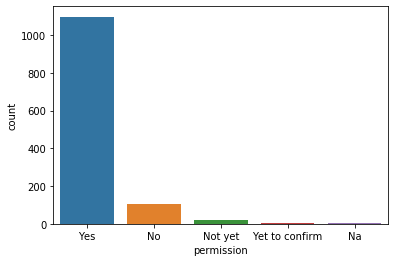

In [60]:
sns.countplot(cat_columns['permission'])
plt.show()

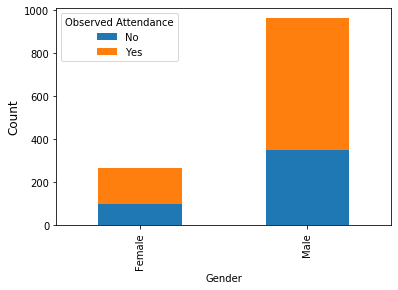

In [61]:
gen = data3.groupby(['Gender', 'Observed Attendance']).size().unstack()
gen.plot(kind = 'bar', stacked = True)
N = 2
ind = np.arange(N)
plt.xticks(ind, ('Female', 'Male'))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender')
plt.show()

In [62]:
gen['perc'] = (gen['No']/(gen['Yes'] + gen['No']))
gen

Observed Attendance,No,Yes,perc
Gender,,,
Female,99,169,0.369403
Male,351,613,0.364108


**Observations:**<br/>
It has been noted that 36 % of both male and female candidates are not showing up.

**Marital Status Vs Observed Attendance**

Text(0.5, 0, 'Marital Status')

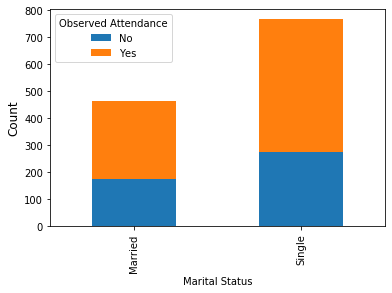

In [63]:
mar = data3.groupby(['Marital Status', 'Observed Attendance']).size().unstack()
mar.plot(kind = 'bar', stacked = True)
N = 2
ind = np.arange(N)
plt.xticks(ind, ('Married', 'Single'))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status')

In [64]:
mar['perc'] = (mar['No']/(mar['Yes'] + mar['No']))
mar

Observed Attendance,No,Yes,perc
Marital Status,,,
Married,176,289,0.378495
Single,274,493,0.357236


**Observations:**<br/>
The above graph states that Married candidates are not showing up to interviews than Single. Its because married candidates might have some responsibilities or stuck with any work often.

**Call letter shared vs Observed Attendance**

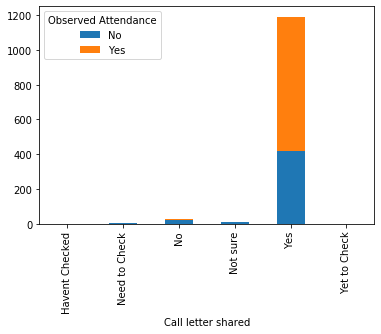

In [65]:
call = data3.groupby(['Call letter shared', 'Observed Attendance']).size().unstack()
call.plot(kind = 'bar', stacked = True)
plt.show()

**Observations**<br/>
It is quite surprising that 35% of candidates who got their call letter, did not show up. Reason might be interview venue was too far. 

**Expected Attendance Vs Observed Attendance**

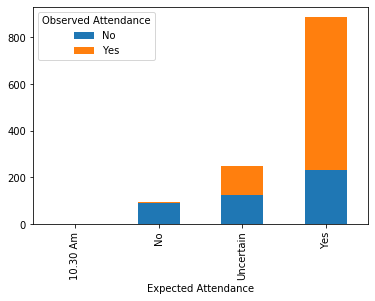

In [66]:
att = data3.groupby(['Expected Attendance', 'Observed Attendance']).size().unstack()
att.plot(kind = 'bar', stacked = True)
plt.show()

**Observations:**
As per our data, most of the candidates who were expected to not to come, they didnt come. But at the same time, some of the candidates who were expected to come also didnt show up. 

**Interview Venue Vs Observed Attendance**

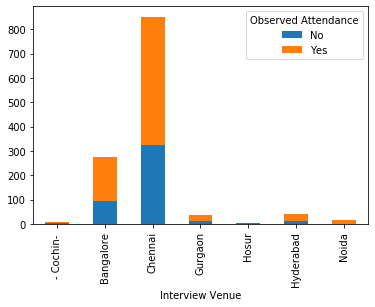

In [67]:
ven = data3.groupby(['Interview Venue', 'Observed Attendance']).size().unstack()
ven.plot(kind = 'bar', stacked = True)

In [68]:
ven['perc'] = (ven['No']/(ven['Yes'] + ven['No']))
ven

Observed Attendance,No,Yes,perc
Interview Venue,,,
- Cochin-,3.0,6.0,0.333333
Bangalore,94.0,182.0,0.340580
Chennai,325.0,527.0,0.381455
Gurgaon,10.0,25.0,0.285714
Hosur,5.0,NaN,NaN
Hyderabad,12.0,28.0,0.300000
Noida,1.0,14.0,0.066667


In [69]:
**Observations:**<br/>
Above graph shows that,<br/> 
99% Candidates showed up in Noida<br/>
38% of candidates didnt show up in Chennai location.<br/>
34% of candidates didnt show up in Bangalore location and so on.

SyntaxError: invalid syntax (<ipython-input-69-998c12f0cd3b>, line 1)

**Venue clear Vs Observed Attendance**

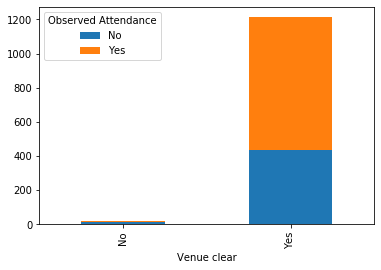

In [70]:
venu = data3.groupby(['Venue clear', 'Observed Attendance']).size().unstack()
venu.plot(kind = 'bar', stacked = True)
plt.show()

In [71]:
venu['perc'] = (venu['No']/(venu['Yes'] + venu['No']))
venu

Observed Attendance,No,Yes,perc
Venue clear,,,
No,16,4,0.800000
Yes,434,778,0.358086


**Observations:**<br/>
It is quite interesting that 35% of candidates who know the venue clearly didnt show up to interview.    

**Month vs Observed Attendance**

In [72]:
data3['month'].value_counts()

02    304
04    178
06    107
12    105
01     89
05     86
4      68
5      66
03     63
09     43
08     36
1      32
11     25
6      14
8       9
2       7
Name: month, dtype: int64

In [73]:
data3['month'].replace(['5', '4','1','6', '8'], 
                        ['05', '04', '01', '06', '08'], inplace = True)

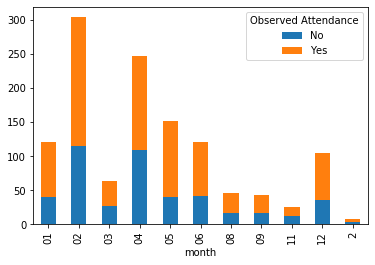

In [74]:
mon = data3.groupby(['month', 'Observed Attendance']).size().unstack()
mon.plot(kind = 'bar', stacked = True)

In [75]:
mon['perc'] = (mon['No']/(mon['Yes'] + mon['No']))
mon

Observed Attendance,No,Yes,perc
month,,,
01,39,82,0.322314
02,114,190,0.375000
03,26,37,0.412698
04,108,138,0.439024
05,40,112,0.263158
06,41,80,0.338843
08,16,29,0.355556
09,16,27,0.372093
11,12,13,0.480000


**Observations:**<br/>
Based on the above results, it is to note that 42% of the candidates didnt show up in December and April months, 41% didnt show up in March and 37% didnt show in February, September months and so on..

Might be it is due to summer and winter seasons.

**Reminder Vs Observed Attendance**

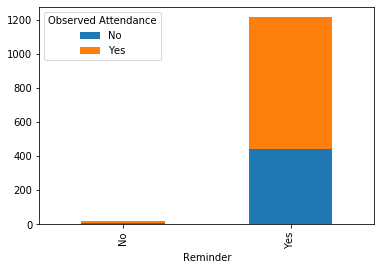

In [76]:
rem = data3.groupby(['Reminder', 'Observed Attendance']).size().unstack()
rem.plot(kind = 'bar', stacked = True)

In [77]:
rem['perc'] = (rem['No']/(rem['Yes'] + rem['No']))
rem

Observed Attendance,No,Yes,perc
Reminder,,,
No,10,9,0.526316
Yes,440,773,0.362737


**Observations:**<br/>
36% candidates did not show up even after reminders.    

**Label Encoding**

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in cat_columns.columns:
    cat_columns[column] = labelencoder.fit_transform(cat_columns[column])

C:\Users\Aravind\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Note:**<br/> 
Converted string categorical columns to numerical categorical columns using Label Encoder. It is just a process of converting the variables to the form we understand easily.

In [79]:
Finaldata = pd.DataFrame(cat_columns)
Finaldata.corr()

,Client name,Industry,Location,Position,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Marital Status,Observed Attendance
Client name,1.000000,-0.530080,-0.458464,0.339549,0.386686,0.018187,-0.164317,-0.394595,-0.434385,-0.149094,0.012409,3.022586e-02,0.056589,0.055467,0.011772,-0.017736,0.019322,2.495141e-02,0.001342,-6.291150e-02
Industry,-0.530080,1.000000,0.334320,-0.438385,-0.350111,0.043980,0.081614,0.355400,0.388822,0.162455,-0.156818,-3.951662e-02,-0.099856,-0.064401,-0.068158,-0.005123,-0.057669,-1.593753e-01,-0.155246,-4.556100e-02
Location,-0.458464,0.334320,1.000000,-0.040629,-0.279713,-0.022903,0.666721,0.772761,0.887340,0.200453,0.008502,-3.994961e-02,-0.095293,-0.037585,-0.030209,0.007900,-0.007311,-1.609583e-03,-0.058421,3.780441e-02
Position,0.339549,-0.438385,-0.040629,1.000000,0.320110,-0.044039,0.078005,0.038656,-0.053280,-0.118307,0.148698,9.047795e-03,0.046849,0.080738,0.056058,0.028001,0.095596,9.173506e-02,0.037407,-4.897838e-02
Interview Type,0.386686,-0.350111,-0.279713,0.320110,1.000000,-0.012494,-0.122026,-0.262738,-0.293741,-0.169689,0.052154,2.090295e-02,0.072706,0.066491,0.052060,0.052353,0.090120,5.698747e-02,0.055312,-8.188289e-02
Gender,0.018187,0.043980,-0.022903,-0.044039,-0.012494,1.000000,0.015546,-0.009627,-0.006697,0.075264,0.030719,-3.691182e-02,-0.034057,0.103182,0.028977,-0.005459,0.011849,4.280428e-02,0.222606,4.537018e-03
Current Location,-0.164317,0.081614,0.666721,0.078005,-0.122026,0.015546,1.000000,0.547612,0.600617,0.140649,0.037268,-2.469168e-02,-0.024034,0.008823,0.012098,0.014979,0.029658,5.927650e-02,-0.047447,4.699930e-02
Candidate Job Location,-0.394595,0.355400,0.772761,0.038656,-0.262738,-0.009627,0.547612,1.000000,0.860795,0.230048,0.017532,-1.138042e-01,-0.046735,-0.001798,-0.040182,0.033714,-0.033077,1.308926e-03,-0.069903,4.161708e-02
Interview Venue,-0.434385,0.388822,0.887340,-0.053280,-0.293741,-0.006697,0.600617,0.860795,1.000000,0.240113,0.009875,-8.611767e-02,-0.127127,-0.038039,-0.031181,0.013656,-0.008054,-1.270105e-02,-0.090985,2.821162e-02
Native,-0.149094,0.162455,0.200453,-0.118307,-0.169689,0.075264,0.140649,0.230048,0.240113,1.000000,-0.017013,6.274297e-02,-0.067395,-0.096040,-0.097457,-0.013825,-0.046614,-9.852741e-02,-0.033534,-6.053616e-03


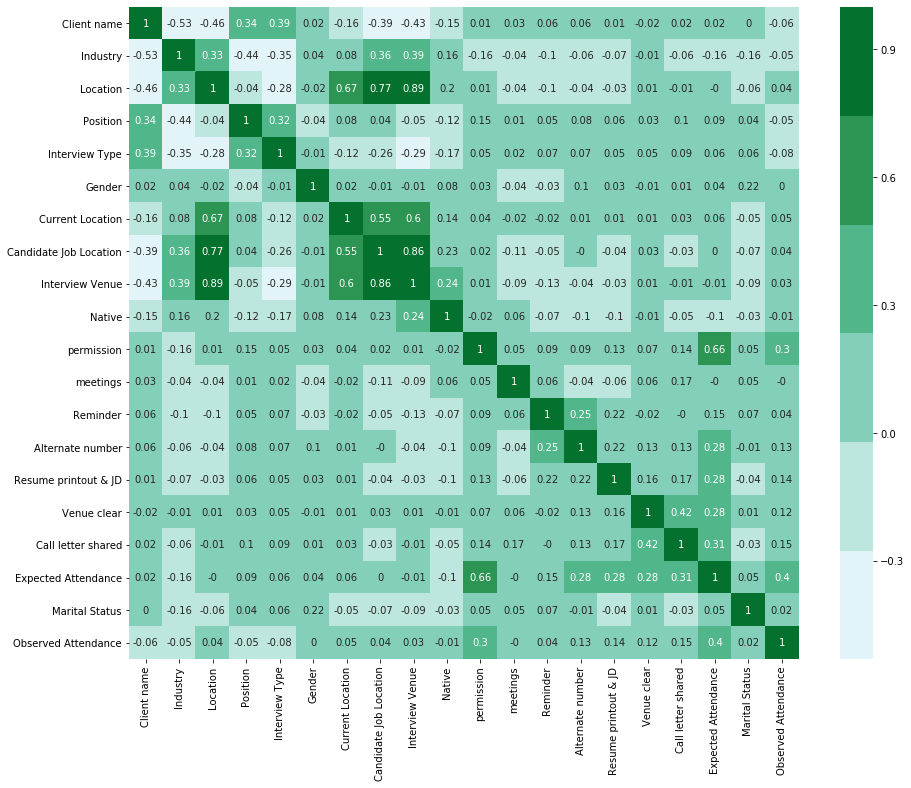

In [80]:
plt.figure(figsize=(15,12))
cor = round(Finaldata.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

**Observations:**<br/>
Above correlation plot shows that Expected attendance and permission columns are slightly correlated with Target Variable. <br/>
Candidate job location and Interview venue are hightly correlated with each other but not with Target variable. So we can drop these columns.<br/>

### Data Partition <a name='dp'></a>

In [81]:
Y = Finaldata['Observed Attendance']
Finaldata.drop(['Observed Attendance'], axis = 1, inplace = True)

In [83]:
# Spltting Data in Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Finaldata,Y,random_state = 15)

### Question: Perform classification using Naive Bayes algorithm and explain the performance

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn import metrics

#Create a Gaussian Classifier
model = GaussianNB() 

# Train the model using the training sets 
NB = model.fit(X_train, Y_train)

#Predict Output 
predicted= model.predict(X_train)
predict_test = model.predict(X_test)

In [85]:
#Let's see how our model performed on Test data
print(classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.82      0.31      0.45       121
           1       0.68      0.96      0.80       187

    accuracy                           0.70       308
   macro avg       0.75      0.63      0.62       308
weighted avg       0.74      0.70      0.66       308



In [86]:
#Confusion matrix
print(confusion_matrix(Y_test, predict_test))

[[ 37  84]
 [  8 179]]


In [87]:
#Train and Test Accuracy
print("Train Accuracy Score:", accuracy_score(Y_train, predicted))
print("Test Accuracy Score:", accuracy_score(Y_test, predict_test))

Train Accuracy Score: 0.7132034632034632
Test Accuracy Score: 0.7012987012987013


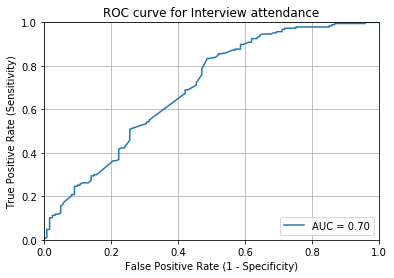

In [88]:
Y_predict_test= NB.predict_proba(X_test)[:,1]
##### False positive Rate, True Positive rate, ROC curve, AUC,
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_predict_test)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='AUC = %0.2f'% roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title('ROC curve for Interview attendance')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Observations and Conclusions: <a name='oc'></a>

**Observations:** <br/>

Interview attendance problem is a serious issue that needs to be addressed. Based on the dataset, I can make the following conclusions:<br/>
The strongest predictors of observed attendance are Expected attendance and permission.<br/>
Though marital status didn't play a large role in attendance, candidates who are married have a slightly higher chance of not showing up. <br/>

**Recommendations:**<br/> 
There are candidates didnot show up even after reminders. So we can target those candidates and get further information for not showing up in order to avoid such instances with other candidates.<br/>
Also we saw that most of the candidates did not show up in summer and winter seasons. In order to avoid that, we can schedule Telephonic interview in those seasons.<br/>

**Conclusion:** <br/>
Results seem pretty similar to the training/test split. ~70% accuracy is decent with this quick analysis after a lot of tinkering.